In [34]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
data = pd.read_csv('/content/adult.csv')

In [3]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
data.loc[(data['workclass'] == '?') & (data['occupation'] != '?')]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


In [5]:
data = data.loc[(data['workclass'] != '?') & (data['occupation'] != '?')]

In [6]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [7]:
data.loc[data['native.country'] == '?']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,?,>50K
65,60,Self-emp-inc,226355,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,2415,70,?,>50K
86,39,Self-emp-not-inc,218490,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,?,>50K
87,43,Federal-gov,156996,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,55,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32428,45,Private,199590,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,?,<=50K
32459,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32476,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32498,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K


In [8]:
data = data.loc[(data['native.country'] != '?')]

In [9]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [11]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
object_describe=data.describe(include=["object"]).T 
object_describe

,count,unique,top,freq
workclass,30162,7,Private,22286
education,30162,16,HS-grad,9840
marital.status,30162,7,Married-civ-spouse,14065
occupation,30162,14,Prof-specialty,4038
relationship,30162,6,Husband,12463
race,30162,5,White,25933
sex,30162,2,Male,20380
native.country,30162,41,United-States,27504
income,30162,2,<=50K,22654


In [13]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [14]:
column_types = data.dtypes
# Print the column types
print(column_types)

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


In [15]:
object_columns=data.select_dtypes(include=["object"]).columns 
for i in range(len(object_columns)):
    print("----- {}-----".format(object_columns[i]))
    print(data[object_columns[i]].value_counts())

----- workclass-----
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64
----- education-----
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64
----- marital.status-----
Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital.status, dtype: int64
----- occupation-----
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Ad

In [16]:
data.loc[data['capital.loss'] == 0]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1519,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1520,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
1521,53,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1522,52,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1523,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


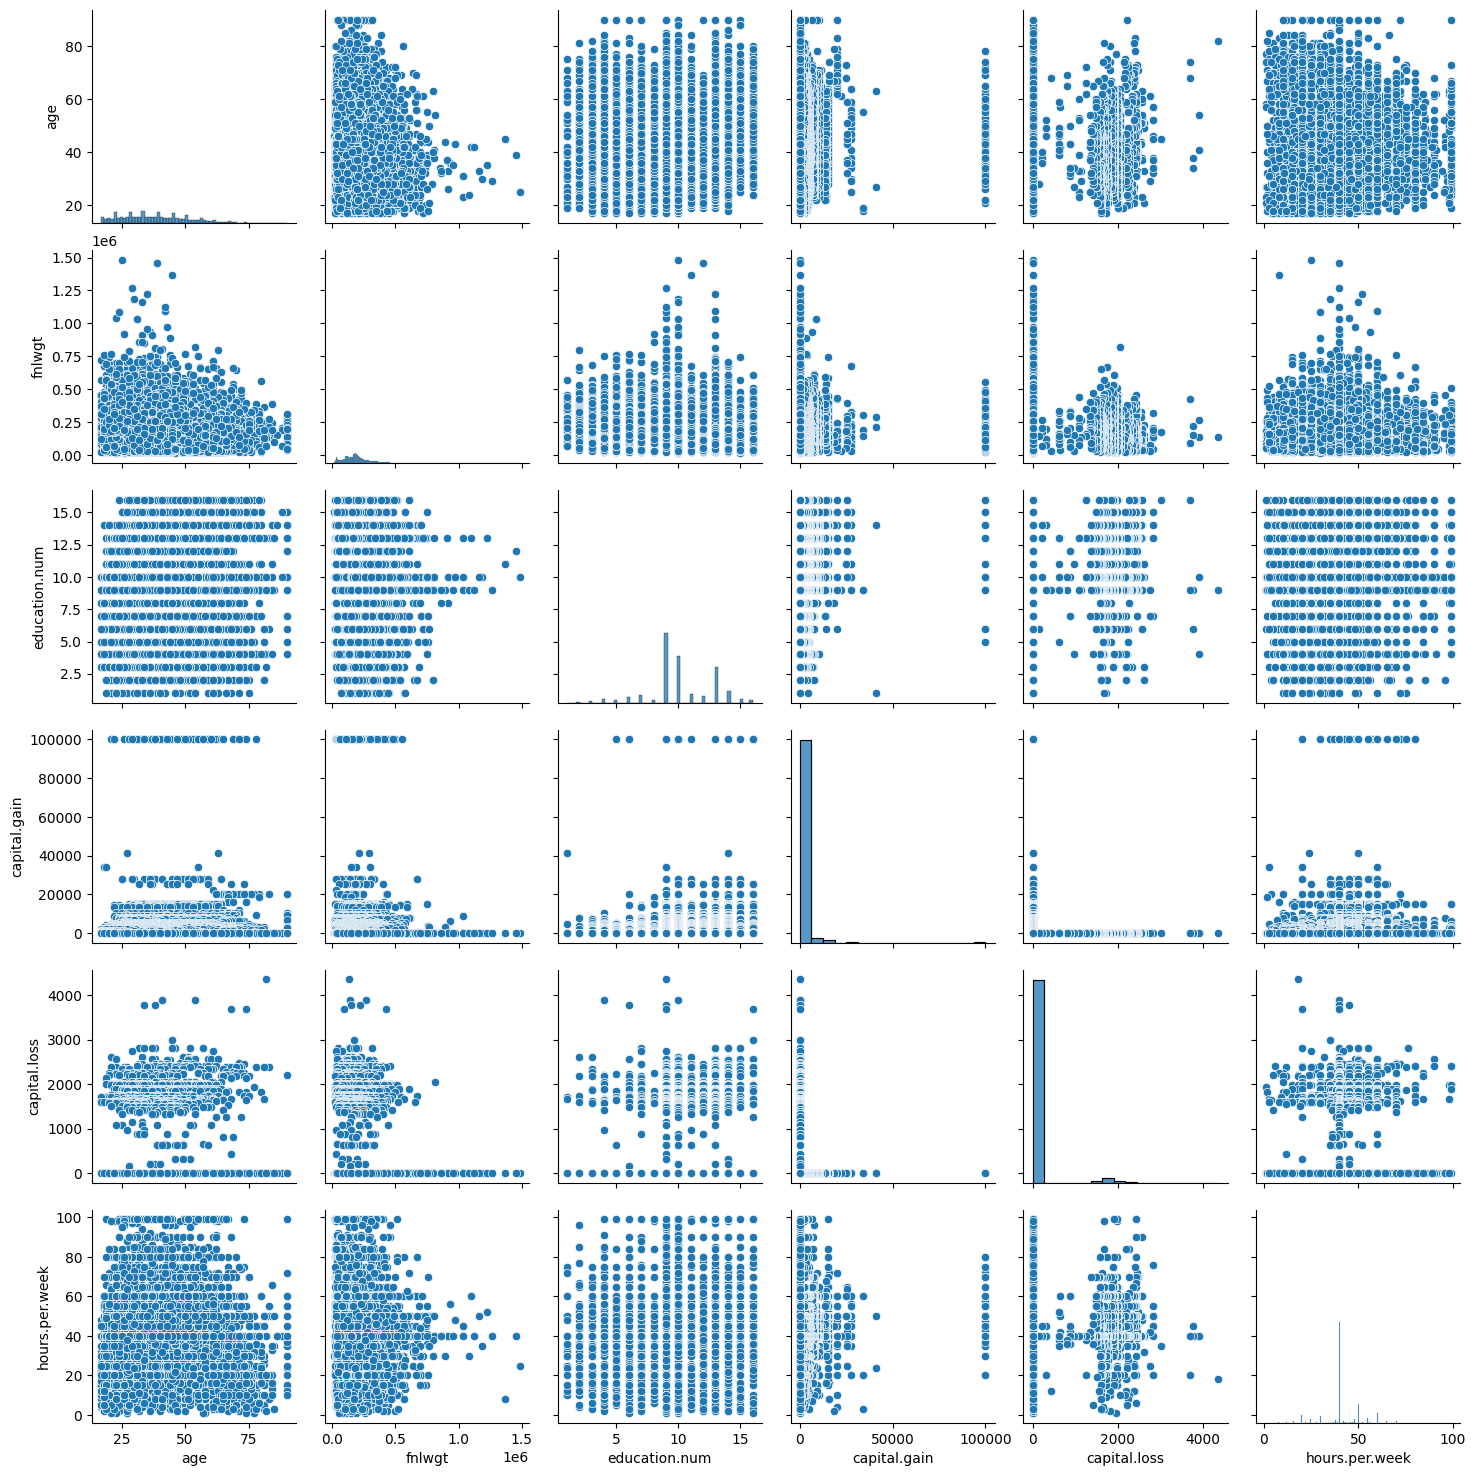

In [17]:
sns.pairplot(data)

In [ ]:
data["education"].value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64

In [ ]:
data.corr()

<ipython-input-39-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education.num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital.gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital.loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours.per.week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


<ipython-input-40-534f5fd5dfff>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()
<ipython-input-40-534f5fd5dfff>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr,dtype=np.bool)


<Axes: >

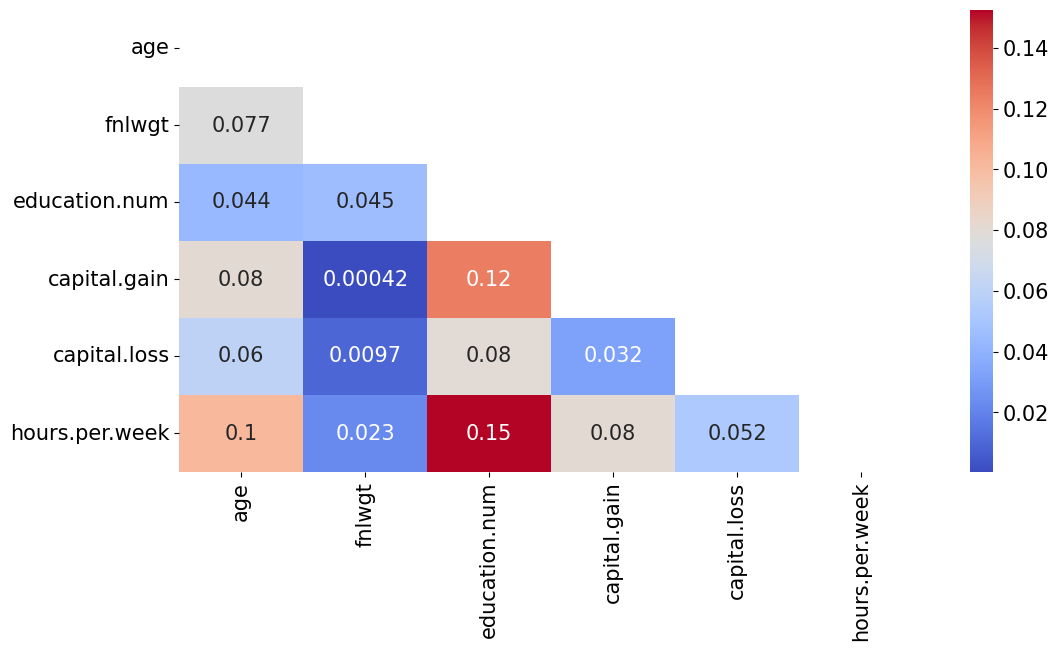

In [ ]:
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 15})
corr=data.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask) 

In [ ]:
loss_withoutzero=data.loc[data["capital.loss"]!=0,:] 
loss_withoutzero

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,37,Private,262409,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,213,45,United-States,<=50K
1515,38,Private,173047,Bachelors,13,Divorced,Adm-clerical,Unmarried,Asian-Pac-Islander,Female,0,213,40,Philippines,<=50K
1516,40,Private,65866,Some-college,10,Divorced,Tech-support,Unmarried,White,Female,0,213,40,United-States,<=50K
1517,36,Private,204590,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,0,213,40,United-States,<=50K


In [ ]:
gain_withoutzero=data.loc[data["capital.gain"]!=0,:] 
gain_withoutzero

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1519,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1520,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
1521,53,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1522,52,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1523,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,20,Private,59948,9th,5,Never-married,Adm-clerical,Unmarried,Black,Female,114,0,20,United-States,<=50K
4227,39,Private,151023,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,114,0,45,United-States,<=50K
4228,33,Private,175412,9th,5,Divorced,Craft-repair,Unmarried,White,Male,114,0,55,United-States,<=50K
4229,38,Private,254439,10th,6,Widowed,Transport-moving,Unmarried,Black,Male,114,0,40,United-States,<=50K


In [ ]:
data["native.country"].value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
Ecuador                     

In [26]:
import pandas as pd
from sklearn.utils import resample

# Split the dataset based on the target variable
majority_class = data[data['income'] == '<=50K']
minority_class = data[data['income'] == '>50K']

# Determine the desired number of samples for the majority class
desired_majority_samples = len(majority_class) - 10162

# Downsample the majority class
downsampled_majority = resample(majority_class,
                                n_samples=desired_majority_samples,
                                replace=False,
                                random_state=42)

# Combine the downsampled majority class with the minority class
balanced_dataset = pd.concat([downsampled_majority, minority_class])

# Use the balanced_dataset for further analysis or modeling

In [28]:
balanced_dataset['income'].value_counts()

<=50K    12492
>50K      7508
Name: income, dtype: int64

In [46]:
balanced_dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [48]:
X=balanced_dataset[['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']]
y=balanced_dataset[['income']]

In [49]:
# from pandas.core.common import random_state

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# regressor = DecisionTreeRegressor(random_state=0)
# x_train_encode= pd.get_dummies(x_train)
# x_val_encode= pd.get_dummies(x_val)
# x_test_encode= pd.get_dummies(x_test)
# # Ensure that validation set has the same encoded features as the training set
# missing_cols = set(x_train_encode.columns) - set(x_val_encode.columns)
# for col in missing_cols:
#     x_val_encode[col] = 0  # Add missing columns and set their values to 0
# # Reorder the columns to match the order in the training set
# x_val_encoded = x_val_encode[x_train_encode.columns]
# clf=DecisionTreeClassifier(random_state=42)
# clf.fit(x_train_encode,y_train)
# y_val_pred= clf.predict(x_val_encode)
# val_accuracy= accuracy_score(y_val,y_val_pred)
# print("Validation accuracy : " ,val_accuracy)
# y_test_pred = clf.predict(x_test_encode)
# test_accuracy= accuracy_score(y_test,y_test_pred)
# print("Test accuracy : " ,test_accuracy)


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Adult Census Income dataset
# df = pd.read_csv('adult.csv')  # Replace 'adult.csv' with the actual file name or path

# Select the features and target variable
features = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
        'hours.per.week', 'native.country']
target = 'income'

# Prepare the data for training, validation, and testing
# X = df[features]
# y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Encode categorical features with explicit column order
X_train_encoded = pd.get_dummies(X_train, columns=features, drop_first=True)
X_val_encoded = pd.get_dummies(X_val, columns=features, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=features, drop_first=True)

# Ensure that validation set has the same encoded features as the training set
missing_cols = set(X_train_encoded.columns) - set(X_val_encoded.columns)
for col in missing_cols:
    X_val_encoded[col] = 0  # Add missing columns and set their values to 0

# Reorder the columns to match the order in the training set
X_val_encoded = X_val_encoded[X_train_encoded.columns]

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_encoded, y_train)

# Make predictions on the validation set
y_val_pred = clf.predict(X_val_encoded)

# Evaluate the accuracy of the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Make predictions on the test set
y_test_pred = clf.predict(X_test_encoded)

# Evaluate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Streaming output truncated to the last 5000 lines.
<ipython-input-49-cda11ee1cec7>:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_val_encoded[col] = 0  # Add missing columns and set their values to 0
<ipython-input-49-cda11ee1cec7>:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_val_encoded[col] = 0  # Add missing columns and set their values to 0
<ipython-input-49-cda11ee1cec7>:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfor

Validation Accuracy: 0.811875


ValueError: ignored